In [5]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# from sklearn.linear_model import RANSACRegressor

from glob import glob
from dataclasses import dataclass

from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from lib import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## Load

In [6]:
data = load("250321-exp7")

/home/tom/Documents/EPFL/BA5/TPIIIa/05-milieux-granulaires/analyse/lib.py:28: UserWarning: loadtxt: input contained no data: "../data/250321-exp7/250321-exp7_step11.txt"
  freq, psd, chi_abs, chi_im = np.loadtxt(file, skiprows=1, delimiter='\t', unpack=True)


## Analysis

199
401


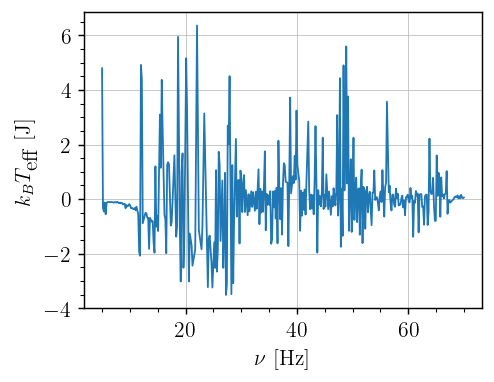

In [13]:
fig, ax = plt.subplots()
noise = data[-1].psd
step = data[2]

clean_psd = step.psd - noise

# cleaned_chi_im = np.convolve(step.chi_im, np.ones(step.chi_im.size)/step.chi_im.size, mode='same')
# cleaned_psd = np.convolve(step.psd, np.ones(step.psd.size)/step.psd.size, mode='same')

kB_Teff = (clean_psd * 2*np.pi*step.freqs) / (4 * step.chi_im)
Teff = kB_Teff/ BOLTZMANN_CONSTANT_JOULE

good_idx = np.abs(sc.stats.zscore(kB_Teff)) < 0.3

print(np.sum(kB_Teff > 0))
print(Teff.size)


# ax.plot(step.freqs, Teff)
# # plt.ylim(-1e25,1e25)
# plt.xlabel(r"$\nu$ [Hz]")
# plt.ylabel(r"$T_\textrm{eff}$ [K]")

# plt.show()

plt.plot(step.freqs[good_idx], kB_Teff[good_idx])
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$k_B T_\textrm{eff}$ [J]")

plt.show()
